In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from citations import npzfile, gfd
reload(npzfile)
reload(gfd)

<module 'citations.gfd' from '/Users/UchidaTakaya/Documents/Python_Workshop/citations/citations/gfd.pyc'>

# Generate an arbitrary field #

$$ z = \cos(x) \sin(y) $$

In [10]:
x = np.arange(-np.pi, np.pi, 1e-3)
y = np.arange(0, 4*np.pi, 1e-2)
z = np.cos(x) * np.sin(y[:, np.newaxis]) 

In [12]:
from tempfile import TemporaryFile
Test_field = TemporaryFile()
np.savez( 'Test_field', z=z, x=x, y=y )
Test_field.seek(0)

In [15]:
fname = 'Test_field.npz'
f = np.load(fname)

print f.keys()

['y', 'x', 'z']


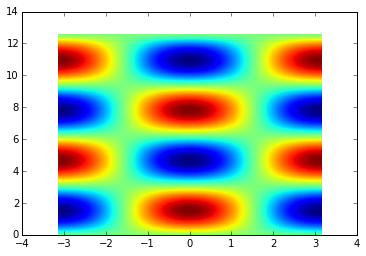

In [19]:
plt.figure()
plt.pcolormesh(f['x'], f['y'], f['z'])

In [43]:
p = npzfile.Calculations(fname)

## Numerical derivative

In [44]:
dz_dx, dz_dy, X, Y = p.derivative(varname='z')

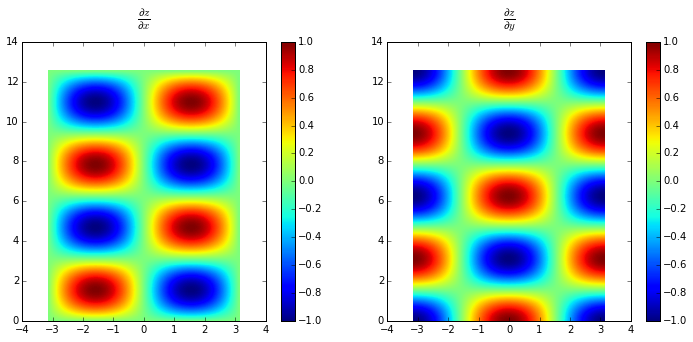

In [57]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ca1 = ax1.pcolormesh(X, Y, dz_dx)
cbar1 = fig.colorbar(ca1)
ax1.set_title(r'$\frac{\partial z}{\partial x}$', y=1.05, fontsize=16)

ax2 = fig.add_subplot(122)
ca2 = ax2.pcolormesh(X, Y, dz_dy)
cbar2 = fig.colorbar(ca2)
ax2.set_title(r'$\frac{\partial z}{\partial y}$', y=1.05, fontsize=16)

## Analytical derivative

$$\frac{\partial z}{\partial x} = - \sin{x} \sin{y}$$

$$\frac{\partial z}{\partial y} = \cos{x} \cos{y}$$

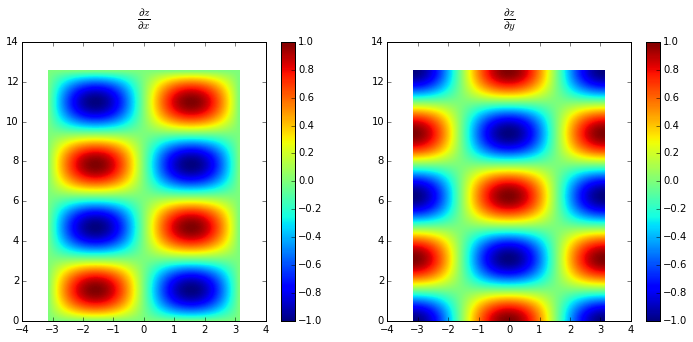

In [58]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ca1 = ax1.pcolormesh(x, y, - np.sin(x) * np.sin(y[:, np.newaxis]))
cbar1 = fig.colorbar(ca1)
ax1.set_title(r'$\frac{\partial z}{\partial x}$', y=1.05, fontsize=16)

ax2 = fig.add_subplot(122)
ca2 = ax2.pcolormesh(x, y, np.cos(x) * np.cos(y[:, np.newaxis]))
cbar2 = fig.colorbar(ca2)
ax2.set_title(r'$\frac{\partial z}{\partial y}$', y=1.05, fontsize=16)